In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

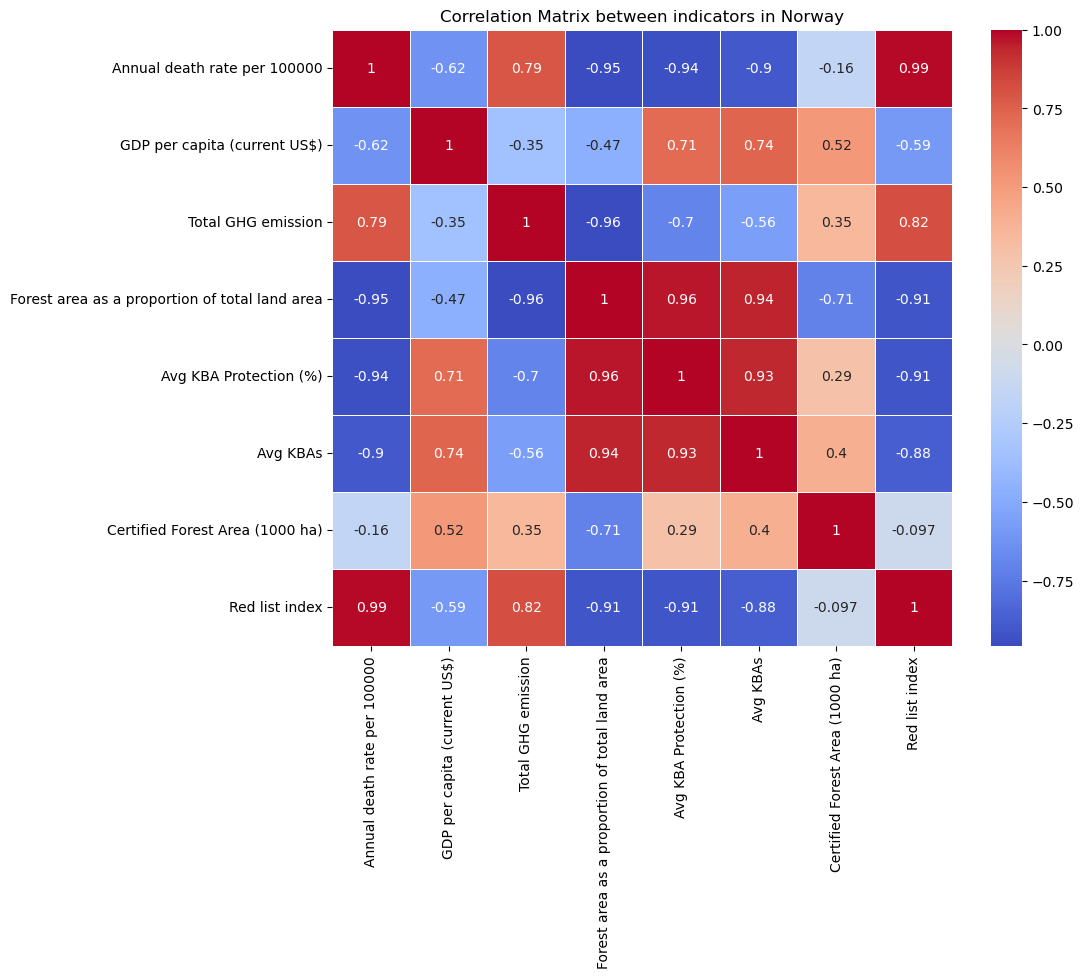

In [26]:
file_path = '/Users/rebeccachen/Desktop/Norwaydata.csv'
df = pd.read_csv(file_path)

# Filter data for Norway
df_Norway = df[df['Country'] == 'Norway ']

# Drop the 'Year' column and keep relevant columns for analysis
predictor_columns = df_Norway.drop(columns=['Year'])

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictor_columns.drop(columns=['Country']))
scaled_df = pd.DataFrame(scaled_data, columns=predictor_columns.drop(columns=['Country']).columns)

# Reordering the columns to match the order you specified
new_column_order = [
    'Annual death rate per 100000',
    'GDP per capita (current US$)',
    'Total GHG emission',
    'Forest area as a proportion of total land area',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n',
    'Average proportion of Terrestrial Key Biodiversity Areas (KBAs)',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n',
    'Red list index'
]


# Reorder and rename columns
scaled_df = scaled_df[new_column_order]

scaled_df.rename(columns={
    'Total GHG Emissions/Capita': 'Total GHG Emissions/Capita',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n': 'Avg KBA Protection (%)',
    'Average proportion of Terrestrial Key Biodiversity Areas (KBAs)': 'Avg KBAs',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n': 'Certified Forest Area (1000 ha)'}, 
    inplace=True)

# Calculate the Pearson correlation matrix
correlation_matrix = scaled_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between indicators in Norway')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since function

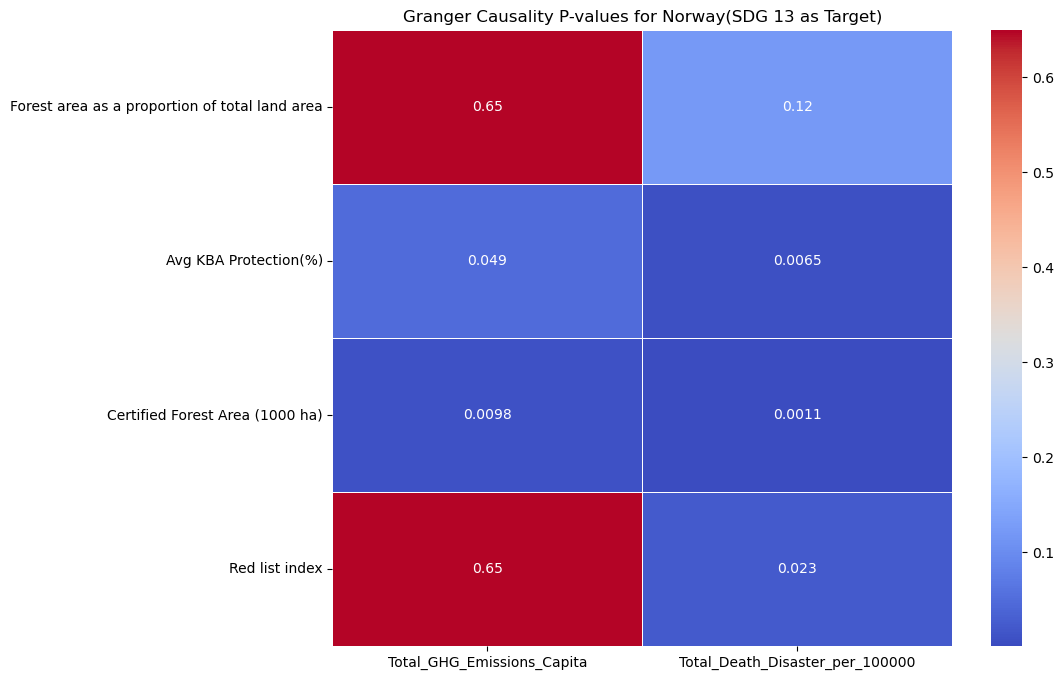

In [28]:
# Load the dataset
file_path = '/Users/rebeccachen/Desktop/Norwaydata.csv'
df = pd.read_csv(file_path)

# Filter data for Norway
df_norway = df[df['Country'] == 'Norway ']

# Drop the 'Year' and 'Country' columns and keep relevant columns for analysis
predictor_columns = df_norway.drop(columns=['Year', 'Country'])

# Reordering the columns to focus on SDG 15 targets and excluding GDP
new_column_order = [
    'Annual death rate per 100000',
    'GDP per capita (current US$)',
    'Total GHG emission',
    'Forest area as a proportion of total land area',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n',
    'Average proportion of Terrestrial Key Biodiversity Areas (KBAs)',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n',
    'Red list index'
]

# Reorder and rename columns
df_norway = df_norway[new_column_order]

# Renaming columns for clarity
df_norway.rename(columns={
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n': 'Avg KBA Protection(%)',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n': 'Certified Forest Area (1000 ha)',
    'Total GHG emission': 'Total_GHG_Emissions_Capita',
    'Annual death rate per 100000': 'Total_Death_Disaster_per_100000'
}, inplace=True)

# Running Granger Causality Test
max_lag = 2
results = {}
target_variables = ['Forest area as a proportion of total land area', 'Avg KBA Protection(%)', 'Certified Forest Area (1000 ha)', 'Red list index']

for target in target_variables:
    p_values = []
    for column in ['Total_GHG_Emissions_Capita', 'Total_Death_Disaster_per_100000']:
        test_result = grangercausalitytests(df_norway[[target, column]].dropna(), max_lag, verbose=False)
        p_values.append([test_result[i+1][0]['ssr_ftest'][1] for i in range(max_lag)])
    results[target] = np.min(p_values, axis=1)  # Take minimum p-value across lags for each variable

# Convert results to a DataFrame
granger_df = pd.DataFrame(results, index=['Total_GHG_Emissions_Capita', 'Total_Death_Disaster_per_100000'])

# Create heatmap to visualize Granger causality test p-values
plt.figure(figsize=(10, 8))
sns.heatmap(granger_df.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Granger Causality P-values for Norway(SDG 13 as Target)')
plt.show()